SPAM MAIL DETECTION

Import Required Libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Load Dataset

In [12]:
raw_mail_data = pd.read_csv('/content/mail_data (2).csv')
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')


Label Encoding

In [13]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

X = mail_data['Message']
Y = mail_data['Category'].astype('int')


Train Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=3
)


Feature Extraction (TF-IDF)

In [15]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


Model Training (Logistic Regression)

In [16]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)


LogisticRegression()

Model Evaluation
Training Accuracy

In [17]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Training Accuracy:", accuracy_on_training_data)


Training Accuracy: 0.9676912721561588


Test Accuracy

In [18]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print("Test Accuracy:", accuracy_on_test_data)


Test Accuracy: 0.9668161434977578


Build a Predictive System

In [19]:
input_mail = ["Congratulations! You've won a free ticket. Claim now!"]

input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")


Spam Mail


Model Accuracy Comparison

In [20]:
accuracy_table = pd.DataFrame({
    "Metric": ["Training Accuracy", "Testing Accuracy"],
    "Score": [accuracy_on_training_data, accuracy_on_test_data]
})

print(accuracy_table)


              Metric     Score
0  Training Accuracy  0.967691
1   Testing Accuracy  0.966816


Confusion Matrix Table

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, prediction_on_test_data)

confusion_df = pd.DataFrame(cm,
                            columns=["Predicted Spam", "Predicted Ham"],
                            index=["Actual Spam", "Actual Ham"])

print(confusion_df)


             Predicted Spam  Predicted Ham
Actual Spam             118             37
Actual Ham                0            960


Spam vs Ham Distribution

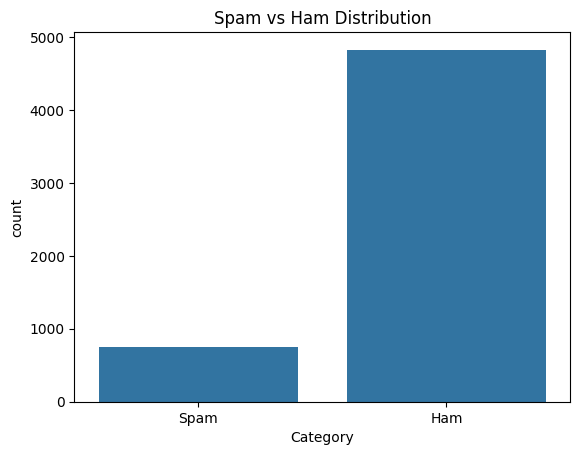

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=mail_data['Category'])
plt.xticks([0,1], ['Spam','Ham'])
plt.title("Spam vs Ham Distribution")
plt.show()


Accuracy Comparison Graph

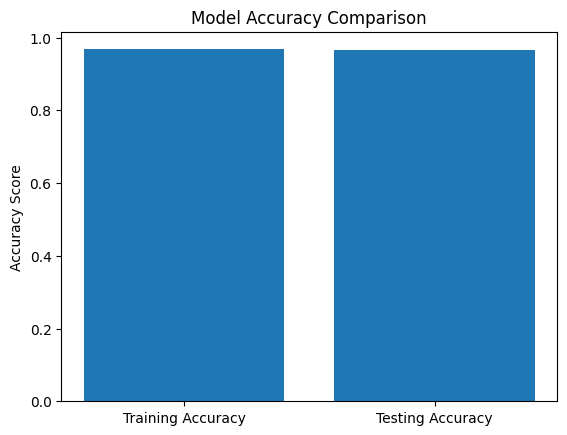

In [23]:
plt.bar(["Training Accuracy", "Testing Accuracy"],
        [accuracy_on_training_data, accuracy_on_test_data])

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()
